In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


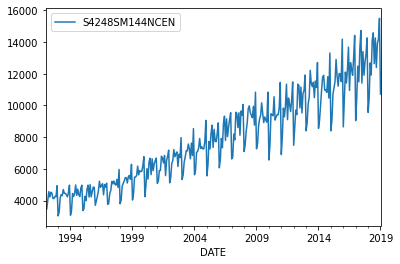

In [5]:
df.plot()
plt.show()

# General Forecasting Model

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
train_data = df.iloc[:-12]
test_data = df.iloc[-12:]

In [29]:
print(df.shape)
print(train_data.shape)
print(test_data.shape)

(325, 1)
(313, 1)
(12, 1)


In [30]:
fitted_model_mm = ExponentialSmoothing(train_data, trend='mul', seasonal='mul',seasonal_periods=12).fit()
fitted_model_aa = ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=12).fit()

c:\users\ilvna\.conda\envs\tf\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [46]:
test_predictions_mm = fitted_model.forecast(12)
test_predictions_aa = fitted_model.forecast(12)

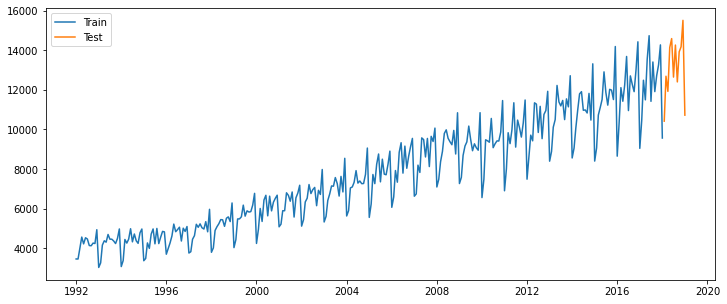

In [47]:
plt.figure(figsize=(12,5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.legend()
plt.show()

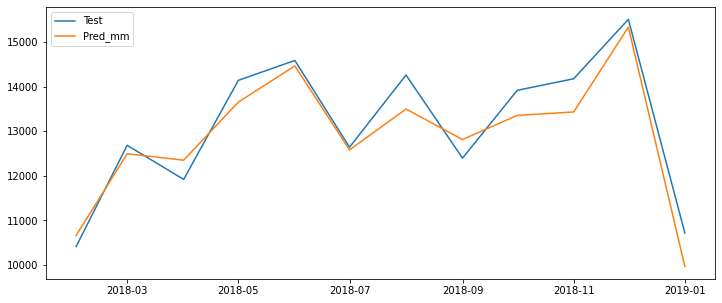

In [48]:
plt.figure(figsize=(12,5))
plt.plot(test_data, label='Test')
plt.plot(test_predictions_mm, label='Pred_mm')
plt.legend()
plt.show()

In [49]:
mae = mean_absolute_error(test_data, test_predictions)
mse = mean_squared_error(test_data ,test_predictions)
rmse = np.sqrt(mse)

In [50]:
print('mae :', mae)
print('mse :', mse)
print('rmse :', rmse)

mae : 411.9015865536535
mse : 229275.45568794024
rmse : 478.82716682320796


In [51]:
final_model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=12).fit()

c:\users\ilvna\.conda\envs\tf\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [52]:
forecast_prediction = final_model.forecast(36)

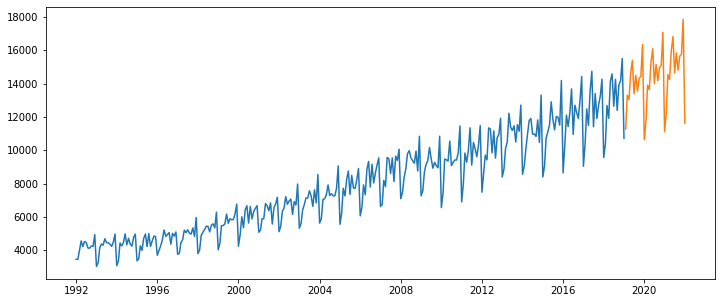

In [53]:
plt.figure(figsize=(12,5))
plt.plot(df)
plt.plot(forecast_prediction)
plt.show()

# ARIMA

In [138]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse

In [67]:
result = seasonal_decompose(df, model='add')

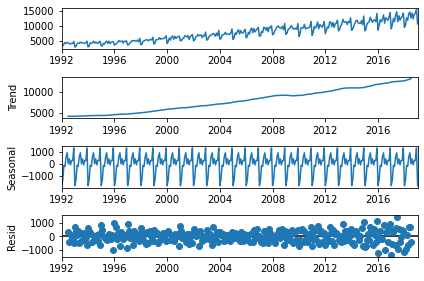

In [70]:
result.plot()
plt.show()

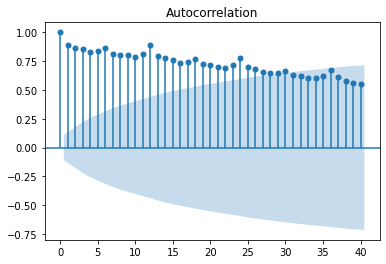

In [79]:
plot_acf(df, lags=40)
plt.show()

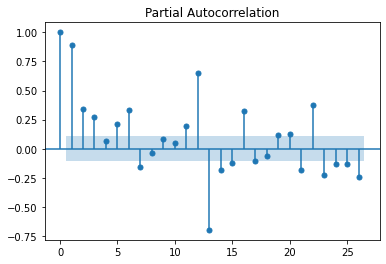

In [80]:
plot_pacf(df)
plt.show()

In [81]:
df_log = np.log(df)

In [84]:
df_log_diff = diff(df_log)

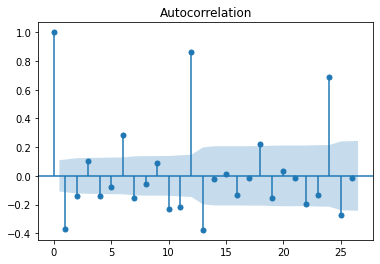

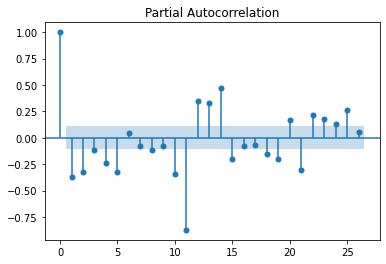

In [90]:
plot_acf(df_log_diff)
plot_pacf(df_log_diff)
plt.show()

In [59]:
print('p-value is : {}'.format(adfuller(df)[1]))

p-value is : 0.9987196267088919


isn't stationary

In [61]:
df_diff = diff(df, k_diff=1)

In [64]:
print('p-value is : {}'.format(adfuller(df_diff)[1]))

p-value is : 0.0003408284921168574


is stationary

## auto_arima

In [122]:
stepwise_fit = auto_arima(df, seasonal=True, trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=4514.024, Time=1.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4868.181, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4731.674, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4629.449, Time=0.66 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=4527.109, Time=0.79 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=4539.016, Time=0.39 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=4499.168, Time=4.80 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=4523.762, Time=1.18 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=inf, Time=7.26 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=4508.118, Time=4.54 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=4526.711, Time=5.72 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=4504.012, Time=3.65 sec
 ARIMA(3,1,2)(2,1,1)[12]             : AIC=4491.408, Time=5.70 sec
 ARIMA(3,1,2)(1,1,1)[12]             : AIC=4506.197, Time=2.39 sec
 ARIMA(3,1,2)(2,1,0)[12]

In [123]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  325
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2212.006
Date:                            Fri, 09 Apr 2021   AIC                           4444.011
Time:                                    11:46:26   BIC                           4481.441
Sample:                                         0   HQIC                          4458.971
                                            - 325                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0899      0.215     -0.418      0.676      -0.512       0.332
ar.L2          0.0985      0.087      1.128      0.259      -0.073       0.270
ar.L3          0.3208      0.069      4.639      0.000       0.185       0.456
ma.L1         -0.7431      0.223     -3.335      0.001      -1.180      -0.306
ma.L2         -0.1539      0.182     -0.845      0.398      -0.511       0.203
ar.S.L12       0.8702      0.068     12.850      0.000       0.737       1.003
ar.S.L24      -0.8249      0.059    -13.973      0.000      -0.941      -0.709
ma.S.L12      -1.1483      0.100    -11.534      0.000      -1.343      -0.953
ma.S.L24       0.6663      0.096      6.959      0.000       0.479       0.854
sigma2      8.337e+04   6834.224     12.199      0.000       7e+04    9.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                10.24
Prob(Q):                              0.67   Prob(JB):                         0.01
Heteroskedasticity (H):               4.23   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
model = SARIMAX(train_data, order=(3,1,2), seasonal_order=(2,1,2,12))

In [126]:
results = model.fit()

c:\users\ilvna\.conda\envs\tf\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     S4248SM144NCEN   No. Observations:                  313
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2130.091
Date:                            Fri, 09 Apr 2021   AIC                           4280.183
Time:                                    11:47:17   BIC                           4317.221
Sample:                                01-01-1992   HQIC                          4295.005
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2578      0.223     -1.158      0.247      -0.694       0.178
ar.L2          0.0882      0.104      0.845      0.398      -0.116       0.293
ar.L3          0.3605      0.085      4.235      0.000       0.194       0.527
ma.L1         -0.6401      0.225     -2.844      0.004      -1.081      -0.199
ma.L2         -0.2576      0.188     -1.373      0.170      -0.625       0.110
ar.S.L12       0.8397      0.124      6.754      0.000       0.596       1.083
ar.S.L24      -0.7472      0.087     -8.554      0.000      -0.918      -0.576
ma.S.L12      -1.1464      0.158     -7.235      0.000      -1.457      -0.836
ma.S.L24       0.6295      0.149      4.230      0.000       0.338       0.921
sigma2       1.02e+05   1.01e+04     10.119      0.000    8.22e+04    1.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 9.97
Prob(Q):                              0.68   Prob(JB):                         0.01
Heteroskedasticity (H):               4.70   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [129]:
pred = results.predict(start, end, typ='level')

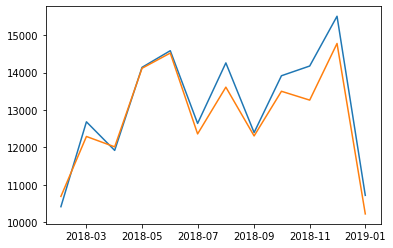

In [132]:
plt.plot(test_data)
plt.plot(pred)
plt.show()

In [141]:
error = rmse(test_data, pred)
error

array([2854.34960749, 1718.78826431, 1867.1512623 , 1812.19483997,
       2065.05758019, 1687.09691322, 1590.03025873, 1711.93822433,
       1559.00525313, 1517.72740288, 2247.46882941, 3260.6541987 ])

In [142]:
model = SARIMAX(df, order=(3,1,2), seasonal_order=(2,1,2,12))

In [144]:
results = model.fit()

c:\users\ilvna\.conda\envs\tf\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [155]:
forecast = results.predict(len(df)-1, len(df)+11, typ='levels')

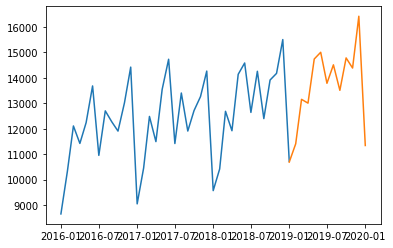

In [156]:
plt.plot(df['2016-01-01':])
plt.plot(forecast)
plt.show()

# LSTM

In [174]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input

In [158]:
nobs = 12

In [160]:
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [165]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [166]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [191]:
n_input = 12
n_features = 1

gen = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [192]:
print(len(scaled_train))
print(len(scaled_test))
print(len(gen))

313
12
301


In [193]:
X, y = gen[0]

In [194]:
X, y

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513],
         [0.12266006],
         [0.09453799],
         [0.09359774],
         [0.10496624],
         [0.10334217],
         [0.16283443]]]),
 array([[0.]]))

In [195]:
inputs = Input(shape=(n_input, n_features))
x = LSTM(150, activation='relu')(inputs)
x = Dense(1)(x)

In [196]:
model = Model(inputs, x)

In [197]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.compile(optimizer='adam', loss='mse')

In [200]:
history = model.fit_generator(gen, epochs = 25)

Epoch 1/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0096
Epoch 2/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0094
Epoch 3/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0087
Epoch 4/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0066
Epoch 5/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0054
Epoch 6/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0039
Epoch 7/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0035
Epoch 8/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0031: 0s
Epoch 9/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0025
Epoch 10/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0021
Epoch 11/25
301/301 [==============================] - 5s 16ms/step - loss: 0.0022
Epoch 12/25
301/301 [==============================] - 5s 17ms/step - loss: 0.0023
Epoch 13/

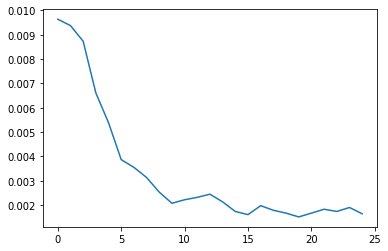

In [201]:
plt.plot(range(len(history.history['loss'])), model.history.history['loss'])

In [202]:
first_eval_batch = scaled_train[-12:]

In [203]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [204]:
model.predict(first_eval_batch)

array([[0.78138685]], dtype=float32)

## Forecast

In [209]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [211]:
test_predictions

[array([0.78138685], dtype=float32),
 array([0.9095711], dtype=float32),
 array([0.85770994], dtype=float32),
 array([1.0188285], dtype=float32),
 array([1.0919129], dtype=float32),
 array([0.84825593], dtype=float32),
 array([1.001781], dtype=float32),
 array([0.87678725], dtype=float32),
 array([0.9534033], dtype=float32),
 array([0.9890802], dtype=float32),
 array([1.060493], dtype=float32),
 array([0.696439], dtype=float32)]

In [212]:
true_predictions = scaler.inverse_transform(test_predictions)

In [213]:
true_predictions

array([[12172.44478464],
       [13672.07242996],
       [13065.34863776],
       [14950.27475297],
       [15805.28861511],
       [12954.74615234],
       [14750.83576441],
       [13288.53398246],
       [14184.86513752],
       [14602.24915051],
       [15437.7075181 ],
       [11178.64018607]])

In [215]:
test['Predictions'] = true_predictions

In [216]:
test

,S4248SM144NCEN,Predictions
DATE,,
2018-02-01,10415,12172.444785
2018-03-01,12683,13672.072430
2018-04-01,11919,13065.348638
2018-05-01,14138,14950.274753
2018-06-01,14583,15805.288615
2018-07-01,12640,12954.746152
2018-08-01,14257,14750.835764
2018-09-01,12396,13288.533982
2018-10-01,13914,14184.865138


<AxesSubplot:xlabel='DATE'>

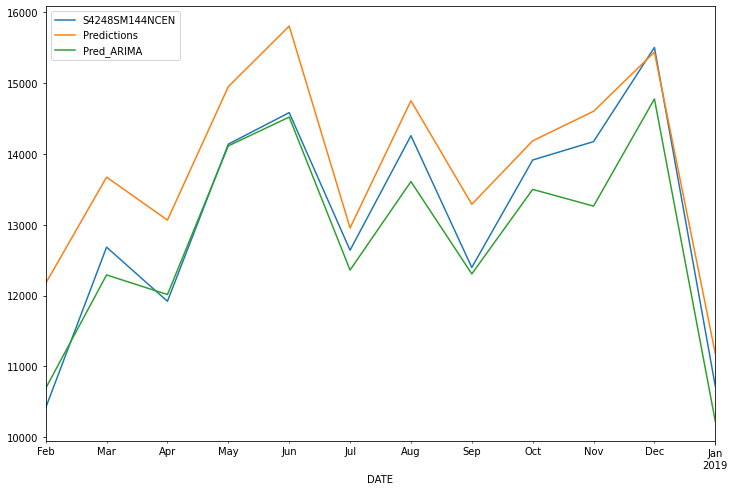

In [223]:
test.plot(figsize=(12,8))

In [219]:
test['Pred_ARIMA'] = pred

In [222]:
print(rmse(test['S4248SM144NCEN'], test['Predictions']))
print(rmse(test['S4248SM144NCEN'], test['Pred_ARIMA']))

873.1015843567056
458.91865971479376
